# Hands-on 2: kNN Notebook (Tutorial)
**Nombre:** Katia Alejandra Avalos Garcia  
**Profesor:** Jose Antonio Aviña Mendez <br>
**Materia:** Clasificacion inteligente de datos

# 1.1  Fundamentos de la técnica

KNN es un algoritmo de Machine Learning no paramétrico que se puede usar tanto para Clasificación como para Regresión, memoriza el conjunto de entrenamiento.

Se empleó el algoritmo K-Nearest Neighbors (KNN) utilizando el enfoque de clasificación para predecir un conjunto finito de clases, determinando si un salario pertenece a la categoría de alto o bajo. Para ello, fue necesario transformar la variable “salary” en una variable categórica, de modo que el modelo pudiera realizar correctamente la clasificación.

La decisión de emplear este modelo se basa en que KNN permite identificar patrones de similitud entre los datos de manera sencilla y efectiva, lo que resulta adecuado para este tipo de problema. En este caso, el objetivo es analizar cuántos años de experiencia son necesarios para estar por encima del salario promedio, utilizando un conjunto de datos que contempla principalmente las variables salario y años de experiencia, con el fin de observar la relación entre ambas.

De esta manera, el modelo busca identificar la brecha y el punto de inflexión donde la experiencia comienza a tener un impacto significativo en el nivel salarial, proporcionando una visión más clara y comprensible sobre el comportamiento de los datos.

# 1.2  Modelo Matemático. 
Calcula la distancia entre el nuevo punto y todos los puntos del conjunto de entrenamiento.
Identifica los $k$ puntos (vecinos) que están más cerca del nuevo punto.<br>
**Clasificación:** Asigna al nuevo punto la clase más frecuente entre esos $k$ vecinos (voto mayoritario).<br>
**Regresión:** Asigna al nuevo punto el promedio de los valores de esos $k$ vecinos.<br>
**Formula:** $$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

+ $d(p, q)$: Distancia ecucladiana entre los puntos 𝑝 y 𝑞
+ $p, q$: qVectores o puntos que se comparan
+ $n$ Número de dimensiones o variables
+ $\sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$ — Suma de todas las diferencias cuadradas de las $n$ dimensiones.



# 1.3  Descripción de la librería, clases, funciones en su respectiva sección
- **numpy:** Facilita cálculos numéricos y de arreglos
     + Funciones: read_csv
- **seaborn** Se visualiza los datos empleando matplotlib pero mas esteticos
     + Funciones: scatterplot()
- **pandas:** Empleado para Dataframes ( cargas de datasets)
     + Funciones: read_csv(), head(), describe()
- **matplotlib** Crea graficos y los visualiza
     + Funciones: plot(), show(), xlabel(), ylabel(), title()
 
  *Clases*
- **StandardScaler:** Escala los datos numéricos para normalizarlos.
- **SimpleImputer:** Rellena valores faltantes con la media.
- **train_test_split:** Divide el dataset en entrenamiento y prueba.
- **KNeighborsClassifier:** Implementa el modelo de K-Vecinos Cercanos (KNN).
- **confusion_matrix, accuracy_score:** Evalúan el rendimiento del modelo.

  

# 1.4. Pipeline 

***Preprocesamiento***: El promedio y desviación estándar permiten conocer la distribución del salario.

Primeras filas del dataset:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Estadísticas básicas:
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000           

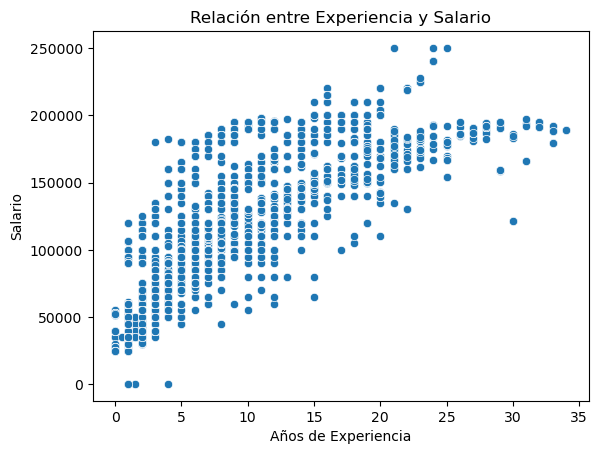

In [38]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# Cargar el dataset
df = pd.read_csv("salary.csv")

# Mostrar primeras filas para tener contexto
print("Primeras filas del dataset:")
print(df.head())

# Estadísticas básicas
print("\nEstadísticas básicas:")
print(df.describe())

# Graficar relación entre experiencia y salario
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title("Relación entre Experiencia y Salario")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.show()


***Feature Engineering***

In [39]:
# Crear una nueva columna categórica: Salario alto o bajo
df['SalaryLevel'] = np.where(df['Salary'] >= df['Salary'].mean(), 'High', 'Low')

# Variables independientes (X) y dependiente (y)
X = df[['Years of Experience']]
y = df['SalaryLevel']

# Reemplazar valores faltantes con la media
rellenador = SimpleImputer(missing_values=np.nan, strategy='mean')
X = rellenador.fit_transform(X)

# Escalar los datos
escalador = StandardScaler()
X_scaled = escalador.fit_transform(X)

***Prediction***

In [40]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Crear el modelo KNN con k=3 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

***Model Evaluation***

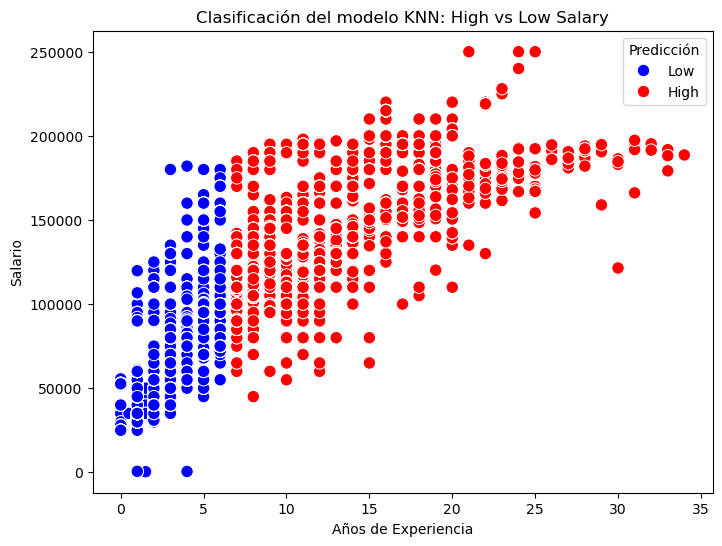

In [41]:
# Realizar predicciones
y_pred = modelo_knn.predict(X_test)

# Predecir las clases reales (High/Low) de todo el conjunto
df['Predicted'] = model.predict(X_scaled)

# Crear un gráfico de dispersión mostrando la clasificación
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Years of Experience',
    y='Salary',
    hue='Predicted',              # colorea según la clase predicha
    palette={'High': 'red', 'Low': 'blue'},
    data=df,
    s=80
)

plt.title("Clasificación del modelo KNN: High vs Low Salary")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.legend(title="Predicción")
plt.show()


+ Matriz de Confusión


In [44]:

# Crear matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Extraer valores individuales
verdaderos_bajos = matriz[0, 0]
falsos_altos = matriz[0, 1]
falsos_bajos = matriz[1, 0]
verdaderos_altos = matriz[1, 1]

# Calcular exactitud
exactitud = accuracy_score(y_test, y_pred)

# Mostrar resultados
print("Matriz de confusión:")
print(matriz)


# Interpretación automática
print(f"""\nPudimos obtener una matriz de confusión donde se observa que el modelo KNN clasificó correctamente 
{verdaderos_bajos} salarios bajos y {verdaderos_altos} salarios altos, mostrando un buen desempeño general en la predicción.

Sin embargo, también se presentaron {falsos_altos} salarios bajos mal clasificados como altos y {falsos_bajos} salarios altos 
mal clasificados como bajos, lo que indica que el modelo aún comete algunos errores al diferenciar los casos 
que están muy cercanos entre los límites de ambas categorías.
""")


Matriz de confusión:
[[861 123]
 [169 859]]

Pudimos obtener una matriz de confusión donde se observa que el modelo KNN clasificó correctamente 
861 salarios bajos y 859 salarios altos, mostrando un buen desempeño general en la predicción.

Sin embargo, también se presentaron 123 salarios bajos mal clasificados como altos y 169 salarios altos 
mal clasificados como bajos, lo que indica que el modelo aún comete algunos errores al diferenciar los casos 
que están muy cercanos entre los límites de ambas categorías.



En general, el resultado sugiere que el modelo tiene una buena capacidad para reconocer patrones en los datos, aunque podría mejorarse ajustando el número de vecinos (k), aplicando una mejor normalización o incorporando más características relevantes relacionadas con el salario.

+ Accuracy

In [45]:
print("\n Procentaje de asertividad del modelo:")
print(f"{accuracy_score(y_test, y_pred):.2f}")


 Procentaje de asertividad del modelo:
0.85


# Referencias Biliograficas:

***González, A. G. (2023, 26 octubre). Modelado matemático del algoritmo KNN (K-Nearest Neighbors) - Panama Hitek. Panama Hitek. https://panamahitek.com/modelado-matematico-del-algoritmo-knn-k-nearest-neighbors/**